> **Integrantes do grupo**: _Arthur Chieppe, Fabricio Neri, Jean Silas e Luiza Valezim_

# APS 1 : Transferência de Calor

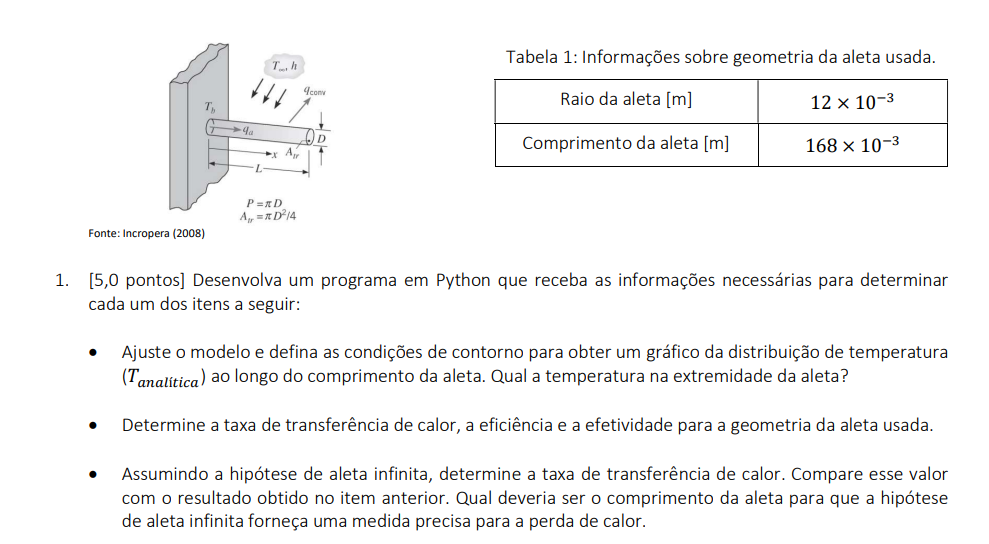

### Carregando as configurações, constantes, valores e funcções necessárias para os cálculos

In [94]:
# imports

from math import *

import matplotlib.pyplot as plt 

import numpy as np


#Informaçoes da aleta


def perimetro_aleta(diametro):
    
    return pi*diametro

def area_aleta(diametro):
    
    return (pi*diametro**2)/4

def calcula_m(h,P,A_tr,k):
    
    return sqrt((h*P)/(A_tr*k))

def calcula_M(h,P,A_tr,k,T_amb,T_b):
    teta_b = T_b-T_amb
    
    return sqrt(h*P*k*A_tr)*teta_b

def distr_calor_geral (h,P,A_tr,k,L,T_amb,T_b,x):
    
    m = calcula_m(h,P,A_tr,k)
    
    num = cosh(m*(L-x))+(h/(m*k))*sinh(m*(L-x))
    
    den = cosh(m*L)+(h/(m*k))*sinh(m*L)
    
    res= num/den
    
    T_l = (T_b-T_amb)*res+ T_amb
    
    return T_l

def transf_calor_geral (h,P,A_tr,k,L,T_amb,T_b) :
    
    m = calcula_m(h,P,A_tr,k)
    M = calcula_M(h,P,A_tr,k,T_amb,T_b)
    
    num = sinh(m*L) + (h/(m*k))*cosh(m*L)
    
    den = cosh(m*L) + (h/(m*k))*sinh(m*L)
    
    return M*(num/den)

def transf_calor_infinita(h,P,A_tr,k,T_amb,T_b):
    
    M = calcula_M(h,P,A_tr,k,T_amb,T_b)
    
    return M

def efetividade (h,P,A_tr,k,L,T_amb,T_b,A_b):
    
    qa = transf_calor_geral(h,P,A_tr,k,L,T_amb,T_b)
    teta_b = T_b-T_amb
    
    return qa/(A_b*teta_b*h)

def efeciencia (h,P,A_tr,k,L,T_amb,T_b,A_s):
    
    # A_s precisa ser da superficie como um todo
    qa = transf_calor_geral(h,P,A_tr,k,L,T_amb,T_b)
    teta_b = T_b-T_amb
    
    return qa/(A_s*teta_b*h)

def fluxo_convecao_newton (h,T_b,T_amb) :
    
    return h*(T_b-T_amb)

def convert_Kelvin_to_Celsius(Temp):
    
    return Temp - 273




# Constantes

# Temperatura do ambiente[K]:
T_amb = 298

# Temperatura da base[K]:
T_b = 373

# Raio da Aleta [m]:
r_aleta = 12e-3 

#Comprimento da aleta [m]:
L = 168e-3

# Diametro da aleta [m] :
diametro_aleta = r_aleta*2

# h -> coeficiente de convecção térmica [W/m^2K]:
h = 12

# P -> Perimetro da aleta [m]:
P = perimetro_aleta(diametro_aleta)

# A_tr -> Área tranversal da Aleta [m^2]:
A_tr = area_aleta(diametro_aleta)

# A_b -> Área da base da Aleta [m^2]:
A_b = A_tr

# A_s -> Área da superfície da Aleta [m^2]:
A_s = A_tr + L*pi*diametro_aleta

# k -> coeficiente de condutividade térmica [W/mk]:
k = 154.808



### Calculando o array de valores de x=0 a L de temperatura do corpo com a aleta e plotando um gráfico

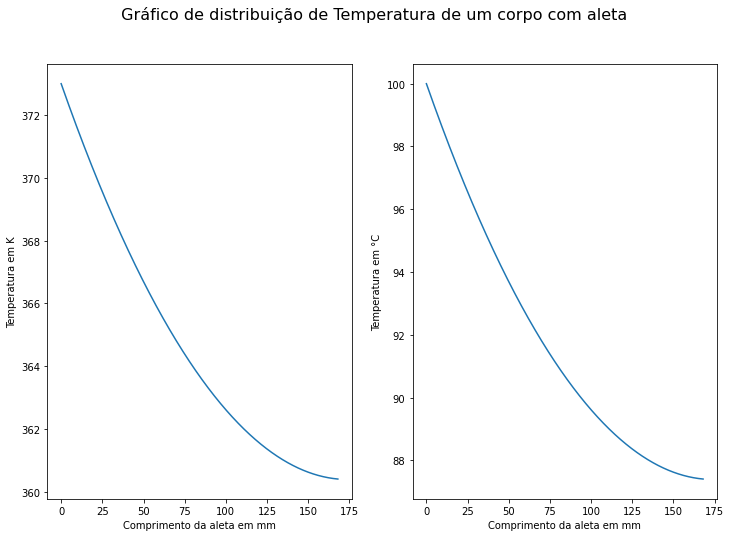





A Temperatura da extremidade da aleta, em K : 360.4088651924218 






In [95]:
# Calculando o array de valores de x=0 a L de temperatura do corpo com a aleta
distribuicao_T = []

# Calculando o array de valores X´s
x_array = np.arange(0,L,1e-6)

for x in x_array :
    
    distribuicao_T.append(distr_calor_geral(h,P,A_tr,k,L,T_amb,T_b,x))


distribuicao_T_Celsius = [convert_Kelvin_to_Celsius(temp) for temp in distribuicao_T ]
x_array_mm = [ x*1e3 for x in x_array ]

fig, (T_K, T_C) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))


fig.suptitle(" Gráfico de distribuição de Temperatura de um corpo com aleta", fontsize=16)

T_K.plot(x_array_mm,distribuicao_T)
T_K.set_ylabel("Temperatura em K")
T_K.set_xlabel("Comprimento da aleta em mm")


T_C.plot(x_array_mm,distribuicao_T_Celsius)
T_C.set_ylabel("Temperatura em °C")
T_C.set_xlabel("Comprimento da aleta em mm")

plt.show()

#Temperatura na extremidade da aleta
print("\n\n\n")
T_L_extr = distribuicao_T[-1]
print(f"A Temperatura da extremidade da aleta, em K : {T_L_extr} ")
print("\n\n\n")



### Calculando a taxa de transferência de calor, a eficiência e a efetividade para a geometria da aleta usada.

In [96]:
# Calculando a taxa de transferência de calor, a eficiência e a efetividade para a geometria da aleta usada.

transfer_de_calor = transf_calor_geral (h,P,A_tr,k,L,T_amb,T_b)
efetividade_aleta = efetividade(h,P,A_tr,k,L,T_amb,T_b,A_b)
eficiencia_aleta = efeciencia(h,P,A_tr,k,L,T_amb,T_b,A_s)

print(f"\nA transferência de calor para a geometria da aleta usada é de : {transfer_de_calor:.4} W\n")
print(f"\nA efetividade para a geometria da aleta usada é de : {efetividade_aleta:.5} \n")
print(f"\nA eficiência para a geometria da aleta usada é de : {eficiencia_aleta*100:.4} % \n")


A transferência de calor para a geometria da aleta usada é de : 10.48 W


A efetividade para a geometria da aleta usada é de : 25.73 


A eficiência para a geometria da aleta usada é de : 88.72 % 



### Assumindo a hipótese da aleta infinita

In [97]:
# Assumindo a hipótese da aleta infinita
transfer_de_calor_infinita = transf_calor_infinita(h,P,A_tr,k,T_amb,T_b)
print(f"\nA transferência de calor para a hipótese de aleta infinita é : {transfer_de_calor:.4} W\n")


A transferência de calor para a hipótese de aleta infinita é : 10.48 W



### Calculando o valor de L para qual o comprimento da aleta seja considerado infinito

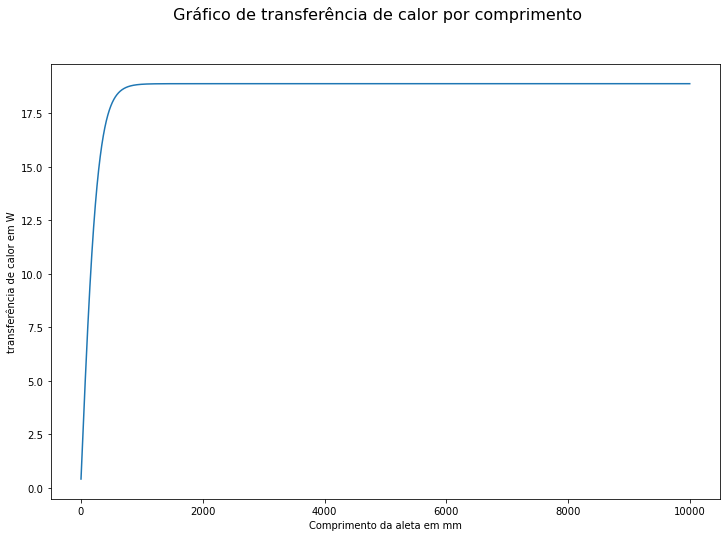

In [98]:
# Calculando o valor de L para qual o compirmento da aleta seja cosiderado infinito
tolerancia  = 1e-2

x_array = np.arange(0,10,1e-6)

x_array_mm = [x*1e3 for x in x_array]

transfer_de_calor_infinita_lista = [transf_calor_geral (h,P,A_tr,k,x,T_amb,T_b) for x in x_array]
diff_transfer_de_calor_infinita_lista = [abs(transf_calor_geral (h,P,A_tr,k,x,T_amb,T_b)- transfer_de_calor_infinita) for x in x_array]

i = 0
while(1):
    if diff_transfer_de_calor_infinita_lista[i] < tolerancia:
        break
    i+= 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))


fig.suptitle(" Gráfico de transferência de calor por comprimento", fontsize=16)

ax.plot(x_array_mm,transfer_de_calor_infinita_lista)
ax.set_ylabel("transferência de calor em W")
ax.set_xlabel("Comprimento da aleta em mm")


plt.show()




In [99]:
print(f" Analiticamente,o comprimento mínimo para o qual a aleta seja considerada infinita é: {x_array[i]*1e3:.5}mm ")

 Analiticamente,o comprimento mínimo para o qual a aleta seja considerada infinita é: 1139.7mm 


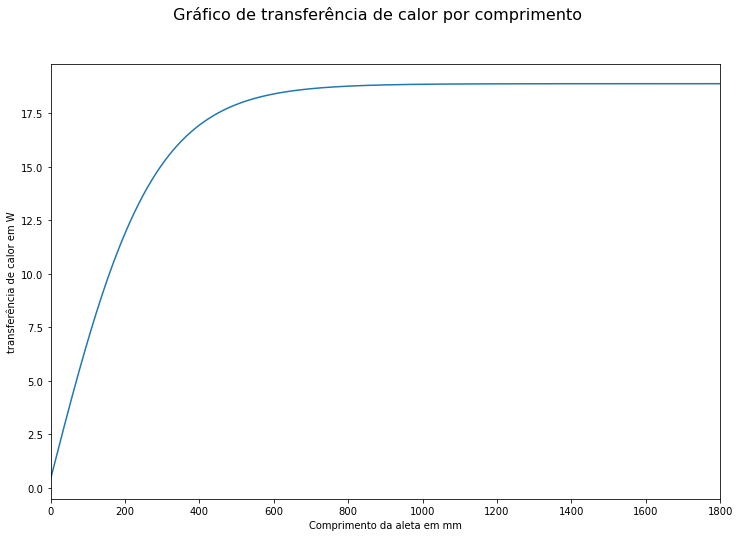

In [101]:
#Vamos dar um zoom para enteder melhor qual o valor está correto
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))


fig.suptitle(" Gráfico de transferência de calor por comprimento", fontsize=16)

ax.plot(x_array_mm,transfer_de_calor_infinita_lista)
ax.set_xlim([0,1800])
ax.set_ylabel("transferência de calor em W")
ax.set_xlabel("Comprimento da aleta em mm")


plt.show()